In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1) Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

# R&D Spend -- Research and devolop spend in the past few years
# Administration -- spend on administration in the past few years
# Marketing Spend -- spend on Marketing in the past few years
# State -- states from which data is collected
# Profit  -- profit of each state in the past few years

In [3]:
df1= pd.read_csv('50_Startups.csv')
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df1.shape

(50, 5)

In [5]:
df1.size

250

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df1.duplicated().any()

False

In [9]:
target1=df1[['Profit']]
target1

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [10]:
features1= df1.drop(['Profit','State'],axis=1)
features1

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [11]:
lin_model=LinearRegression()

In [12]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features1,target1,train_size=0.75,random_state=7)

In [13]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(37, 3)
(13, 3)
(37, 1)
(13, 1)


In [14]:
x_train1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
dtype: int64

In [15]:
y_train1.isnull().sum()

Profit    0
dtype: int64

In [16]:
lin_model.fit(x_train1,y_train1)

LinearRegression()

In [17]:
y_pred1= lin_model.predict(x_test1)
y_pred1

array([[127278.56537088],
       [146216.2631846 ],
       [114693.32250056],
       [ 70401.75457452],
       [ 99003.66454901],
       [114454.37407719],
       [189377.73779302],
       [116704.77048301],
       [135503.67028599],
       [ 74905.48041758],
       [ 98325.83541492],
       [ 56049.27946859],
       [ 88428.23484832]])

In [18]:
lin_model.intercept_

array([50430.89080749])

In [19]:
lin_model.coef_

array([[ 0.8078514 , -0.03628248,  0.02947615]])

In [20]:
lin_model.score(x_test1,y_test1)

0.939474875444101

In [21]:
sse= ((y_pred1-y_test1)**2).sum()
sse

Profit    9.091040e+08
dtype: float64

In [22]:
sst= ((y_test1-y_test1.mean())**2).sum()
sst

Profit    1.502028e+10
dtype: float64

In [23]:
Rsquared= 1-(sse/sst)
Rsquared

Profit    0.939475
dtype: float64

In [24]:
import seaborn as sns

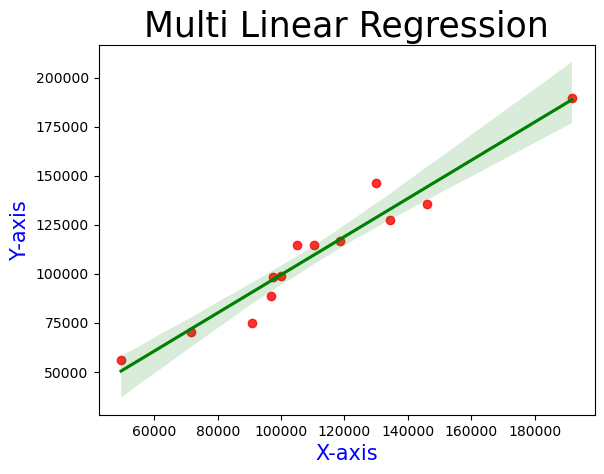

In [25]:
sns.regplot(data=df1, x=y_test1,y=y_pred1,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.xlabel('X-axis',size=15,color='blue')
plt.ylabel('Y-axis',size=15,color='blue')
plt.title('Multi Linear Regression',color='black',size=25)
plt.show()

In [26]:
from sklearn.linear_model import Lasso,Ridge

### Lasso 

In [27]:
lasso1=Lasso(alpha=1)

In [28]:
lasso1.fit(x_train1,y_train1)

Lasso(alpha=1)

In [29]:
y_pred1_l=lasso1.predict(x_test1)
y_pred1_l

array([127278.56537778, 146216.26319966, 114693.32247172,  70401.75453629,
        99003.66456806, 114454.37403522, 189377.73780911, 116704.77045244,
       135503.67029397,  74905.48038477,  98325.83545548,  56049.27938036,
        88428.23484342])

In [30]:
lasso1.coef_

array([ 0.8078514 , -0.03628248,  0.02947615])

In [31]:
lasso1.intercept_

array([50430.89074097])

In [32]:
lasso1.score(x_test1,y_test1)

0.9394748754911275

<Axes: xlabel='Profit'>

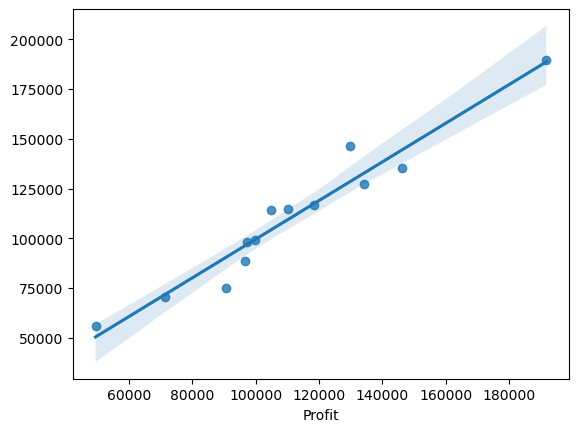

In [33]:
sns.regplot(data=df1,x=y_test1,y=y_pred1_l)

### Ridge

In [34]:
ridge1=Ridge(alpha=1)

In [35]:
ridge1.fit(x_train1,y_train1)

Ridge(alpha=1)

In [36]:
y_pred1_r=ridge1.predict(x_test1)
y_pred1_r

array([[127278.56537115],
       [146216.26318385],
       [114693.3225019 ],
       [ 70401.75457541],
       [ 99003.66454809],
       [114454.3740793 ],
       [189377.73779318],
       [116704.77048403],
       [135503.6702851 ],
       [ 74905.48041952],
       [ 98325.83541366],
       [ 56049.27947254],
       [ 88428.23485029]])

In [37]:
ridge1.coef_

array([[ 0.8078514 , -0.03628248,  0.02947615]])

In [38]:
ridge1.intercept_

array([50430.89080561])

In [39]:
ridge1.score(x_test1,y_test1)

0.9394748754445442

<Axes: xlabel='Profit'>

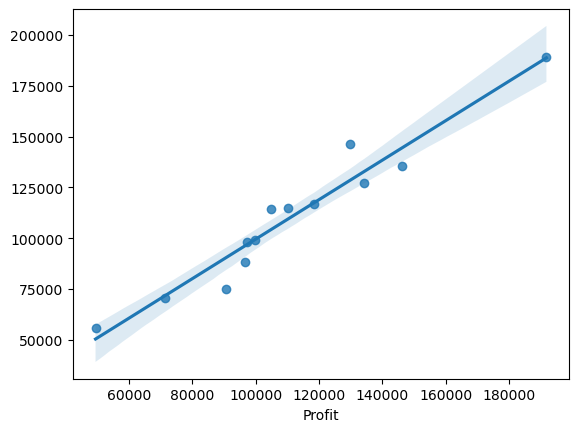

In [40]:
sns.regplot(data=df1,x=y_test1,y=y_pred1_r)

In [41]:
# 2) Consider only the below columns and prepare a prediction model for predicting Price.
# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

# Model -- model of the car
# Price  -- Offer Price in EUROs	
# Age_08_04 -- Age in months as in August 2004	
# Mfg_Month -- Manufacturing month (1-12)	
# Mfg_Year	-- Manufacturing Year
# KM -- Accumulated Kilometers on odometer
# Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
# HP -- Horse Power
# Met_Color	 -- Metallic Color?  (Yes=1, No=0)
# Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
# Automatic	-- Automatic ( (Yes=1, No=0)
# cc -- Cylinder Volume in cubic centimeters
# Doors -- Number of doors
# Cylinders	-- Number of cylinders
# Gears -- Number of gear positions
# Quarterly_Tax -- Quarterly road tax in EUROs
# Weight -- Weight in Kilograms
# Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
# BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
# Guarantee_Period -- 	Guarantee period in months
# ABS -- Anti-Lock Brake System (Yes=1, No=0)
# Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
# Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
# Airco -- Airconditioning  (Yes=1, No=0)
# Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
# Boardcomputer -- Boardcomputer  (Yes=1, No=0)
# CD_Player -- CD Player  (Yes=1, No=0)
# Central_Lock -- Central Lock  (Yes=1, No=0)
# Powered_Windows -- Powered Windows  (Yes=1, No=0)
# Power_Steering -- Power Steering  (Yes=1, No=0)
# Radio -- Radio  (Yes=1, No=0)
# Mistlamps	-- Mistlamps  (Yes=1, No=0)
# Sport_Model -- Sport Model  (Yes=1, No=0)
# Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
# Metallic_Rim --Metallic Rim  (Yes=1, No=0)
# Radio_cassette -- Radio Cassette  (Yes=1, No=0)
# Tow_Bar -- Tow Bar  (Yes=1, No=0)



In [42]:
df2=pd.read_csv('ToyotaCorolla.csv',encoding="latin1")
df2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
df2_new=df2[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df2_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
df2_new.shape

(1436, 9)

In [46]:
df2_new.size

12924

In [47]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [48]:
df2.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [49]:
df2_new.duplicated().any()

True

In [50]:
df2_new.drop_duplicates(inplace=True)
df2_new

C:\Users\hpriy\AppData\Local\Temp\ipykernel_10708\1563902132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new.drop_duplicates(inplace=True)


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
target2=df2_new[['Price']]
target2

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [52]:
features2=df2_new.drop(['Price','Doors','Gears'],axis=1)
features2

,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
0,23,46986,90,2000,210,1165
1,23,72937,90,2000,210,1165
2,24,41711,90,2000,210,1165
3,26,48000,90,2000,210,1165
4,30,38500,90,2000,210,1170
...,...,...,...,...,...,...
1431,69,20544,86,1300,69,1025
1432,72,19000,86,1300,69,1015
1433,71,17016,86,1300,69,1015
1434,70,16916,86,1300,69,1015


In [53]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=90)

In [54]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1076, 6)
(1076, 1)
(359, 6)
(359, 1)


In [55]:
x_train2.isnull().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Quarterly_Tax    0
Weight           0
dtype: int64

In [56]:
y_train2.isnull().sum()

Price    0
dtype: int64

In [57]:
lin_model.fit(x_train2,y_train2)

LinearRegression()

In [58]:
y_pred2= lin_model.predict(x_test2)
y_pred2

array([[19805.30073921],
       [ 8186.57197681],
       [ 6294.56359791],
       [ 8817.41076215],
       [ 9245.65316256],
       [13113.75567673],
       [ 7487.10078132],
       [ 9003.96779681],
       [ 9303.91193877],
       [ 9717.63905795],
       [ 5818.9050606 ],
       [ 8612.35879273],
       [12285.06748828],
       [ 7622.33108249],
       [17395.56908823],
       [15946.1701712 ],
       [ 8008.02937574],
       [12803.29160525],
       [16264.45581002],
       [ 8909.89904808],
       [14050.52024977],
       [ 9560.0645715 ],
       [13585.62867824],
       [16231.42867384],
       [12355.64788084],
       [ 9379.06370026],
       [ 8170.72209848],
       [ 7509.71309347],
       [ 8143.98415132],
       [ 9668.7123794 ],
       [10069.62585965],
       [11365.15861976],
       [ 8941.8082391 ],
       [10912.14667312],
       [ 7248.51573361],
       [ 9085.45568766],
       [ 8417.02595498],
       [ 8939.20032355],
       [13186.55591652],
       [11910.11345815],


In [59]:
lin_model.intercept_

array([-4565.31350457])

In [60]:
lin_model.coef_

array([[-1.19318469e+02, -2.08164333e-02,  3.29172182e+01,
        -1.19719181e-01,  3.32977498e+00,  1.85912790e+01]])

In [61]:
lin_model.score(x_test2,y_test2)

0.8469217507364756

In [62]:
sse= ((y_pred2-y_test2)**2).sum()
sse

Price    7.062404e+08
dtype: float64

In [63]:
sst= ((y_test2-y_test2.mean())**2).sum()
sst

Price    4.613591e+09
dtype: float64

In [64]:
Rsquared= 1-(sse/sst)
Rsquared

Price    0.846922
dtype: float64

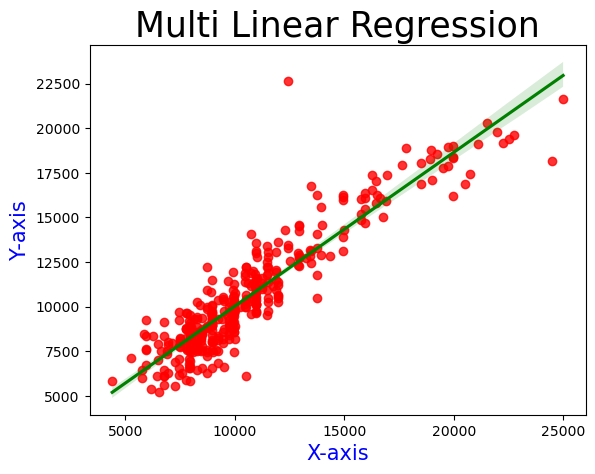

In [65]:
sns.regplot(data=df2_new, x=y_test2,y=y_pred2,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.xlabel('X-axis',size=15,color='blue')
plt.ylabel('Y-axis',size=15,color='blue')
plt.title('Multi Linear Regression',color='black',size=25)
plt.show()

### Lasso

In [66]:
lasso2=Lasso(alpha=1)

In [67]:
lasso2.fit(x_train2,y_train2)

Lasso(alpha=1)

In [68]:
y_pred2_l=lasso2.predict(x_test2)
y_pred2_l

array([19805.12400896,  8186.71527701,  6294.68912194,  8817.27082118,
        9245.62693727, 13113.72018849,  7487.14654783,  9004.08943282,
        9304.0039483 ,  9717.66855749,  5819.1220074 ,  8612.32687174,
       12285.13264156,  7622.48836581, 17395.53258178, 15946.11639516,
        8008.0820727 , 12803.17720137, 16264.41542973,  8909.94876891,
       14050.46373   ,  9560.06078288, 13585.46011509, 16231.38171322,
       12355.52773876,  9379.17298201,  8170.86389231,  7509.76822043,
        8144.07679358,  9668.39570316, 10069.58819317, 11365.06007964,
        8941.8002032 , 10912.12814511,  7248.53943104,  9085.6389719 ,
        8416.98047018,  8939.29200736, 13186.40328504, 11910.08038781,
       10543.63314027,  6456.23952396,  9671.94772218,  9784.38707237,
       11436.42027809, 12215.47943084,  8552.85364442,  9076.27157028,
       12210.52730709,  8648.67035711,  6984.95589255, 18187.88214631,
        8743.63445125, 16793.37475882,  9730.70838974, 13612.77444866,
      

In [69]:
lasso2.coef_

array([-1.19313818e+02, -2.08179188e-02,  3.29105043e+01, -1.19683872e-01,
        3.32813020e+00,  1.85925806e+01])

In [70]:
lasso2.intercept_

array([-4566.09813857])

In [71]:
lasso2.score(x_test2,y_test2)

0.846920333410371

<Axes: xlabel='Price'>

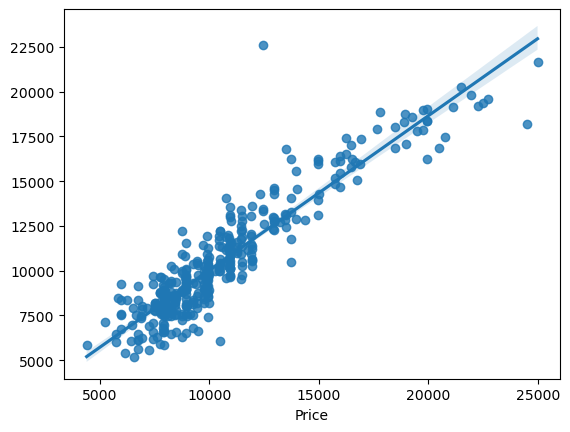

In [72]:
sns.regplot(data=df2,x=y_test2,y=y_pred2_l)

### Ridge

In [73]:
ridge2=Ridge(alpha=1)

In [74]:
ridge2.fit(x_train2,y_train2)

Ridge(alpha=1)

In [75]:
y_pred2_r=ridge2.predict(x_test2)

In [76]:
ridge2.coef_

array([[-1.19317866e+02, -2.08166017e-02,  3.29170256e+01,
        -1.19718757e-01,  3.32976699e+00,  1.85913790e+01]])

In [77]:
ridge2.intercept_

array([-4565.42336302])

In [78]:
ridge2.score(x_test2,y_test2)

0.846921574608108

<Axes: xlabel='Price'>

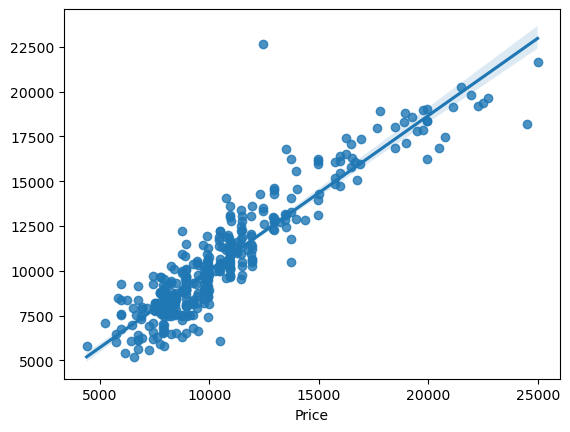

In [79]:
sns.regplot(data=df2,x=y_test2,y=y_pred2_r)